# Detector de Mentiras

In [1]:
import numpy as np
nb_hypothesis = 20000
alpha = 1
beta = 20
p_lye = 0.5
p_truth = 0.5

np.random.seed(1234)
# Hypothesis source : TRUE (1) False (0)
def get_hypothesis(p_true,nb):
  p_lye = 1 - p_true
  out = np.random.choice(2,nb,p=[p_true,p_lye])
  return out
hypothesis = get_hypothesis(p_truth,nb_hypothesis)
# Output of brain cell activity instrument
def get_brain_activity(hypothesis, alfa, beta):
  out = [np.random.exponential(1/alfa) if hypothesis[i]==1 else np.random.exponential(1/beta) for i in range(len(hypothesis)) ]
  return out
observation = get_brain_activity(hypothesis, alpha, beta)

# Lyier Detector
def detect(input, alpha, beta, p_true):
  p_lye = 1 - p_true
  theta = 1/(beta-alpha) * np.log( (p_lye*beta)/(p_true*alpha))
  out_hypothesis = [1 if input[i]>theta else 0 for i in range(len(input))]
  return [theta, out_hypothesis]

theta, hyp_detected = detect(observation, alpha, beta, p_truth)
error = [1 if hypothesis[i]!= hyp_detected[i] else 0 for i in range(nb_hypothesis)]
print(np.sum(error)/nb_hypothesis)  
#print(error)
#print(hypothesis)
#print(observation)
#print(hyp_detected)
#print(theta)

0.0963


In [2]:
def simulador_pe(alpha, beta, p_truth, nb):
  hypothesis = get_hypothesis(p_truth,nb)
  observation = get_brain_activity(hypothesis, alpha, beta)
  [theta, hyp_detected] = detect(observation, alpha, beta, p_truth)
  error = [1 if hypothesis[i]!= hyp_detected[i] else 0 for i in range(nb)]
  #print(hypothesis)
  #print(observation)
  #print(hyp_detected)
  #print(theta)
  #print(error)
  return (np.sum(error)/nb)

nb_hypothesis = 10000
alpha = 1
beta = 20
p_truth = 0.5

#print(detect([1.56],alpha,beta,0.5))
pe = simulador_pe(alpha, beta, p_truth, nb_hypothesis)
print(pe)
#print(hypothesis)
#print(observation)
#print(hyp_detected)
#np.random.choice(2,nb_hypothesis,p )

0.0882


(array([[736., 200.,  46.,  14.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [337., 244., 145.,  92.,  67.,  48.,  24.,  17.,  12.,   3.,   5.,
           1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   1.]]),
 array([2.60816631e-03, 1.27606028e+00, 2.54951239e+00, 3.82296451e+00,
        5.09641662e+00, 6.36986874e+00, 7.64332085e+00, 8.91677297e+00,
        1.01902251e+01, 1.14636772e+01, 1.27371293e+01, 1.40105814e+01,
        1.52840335e+01, 1.65574857e+01, 1.78309378e+01, 1.91043899e+01,
        2.03778420e+01, 2.16512941e+01, 2.29247462e+01, 2.41981983e+01,
        2.54716505e+01]),
 <a list of 2 BarContainer objects>)

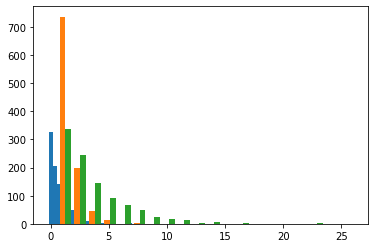

In [3]:
import matplotlib.pyplot as plt

y_truth = np.random.exponential(1,1000)
plt.hist(y_truth,20,align='left')
y_lyier = np.random.exponential(3,1000)
plt.hist([y_truth, y_lyier],20,align='right')